In [1]:
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Random seed for reproducibility
seed = 16

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [3]:
dataset_path = os.path.join('../input/anndlhw2/Training.csv')

In [4]:
X = np.genfromtxt('../input/anndlhw2/Training.csv',delimiter=',',skip_header=True)

In [5]:
df = pd.DataFrame(X)

In [6]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

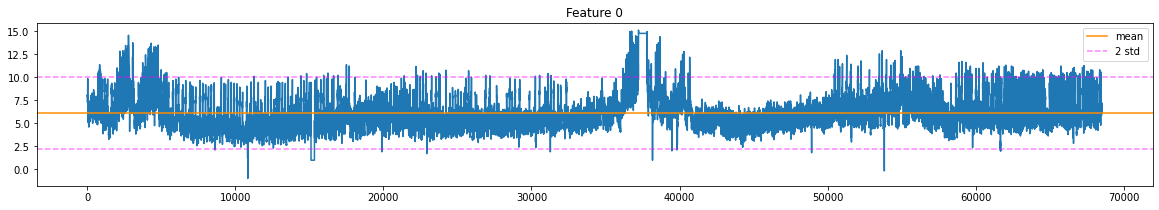

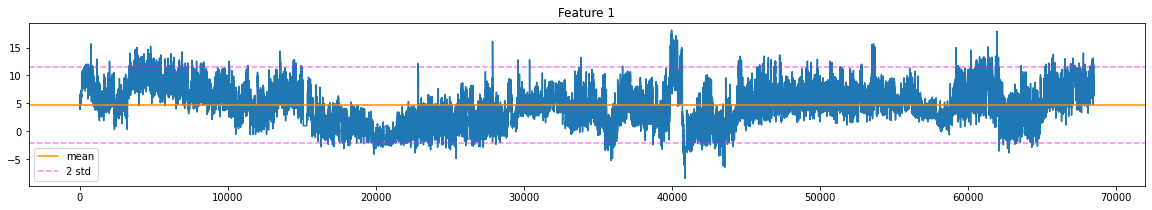

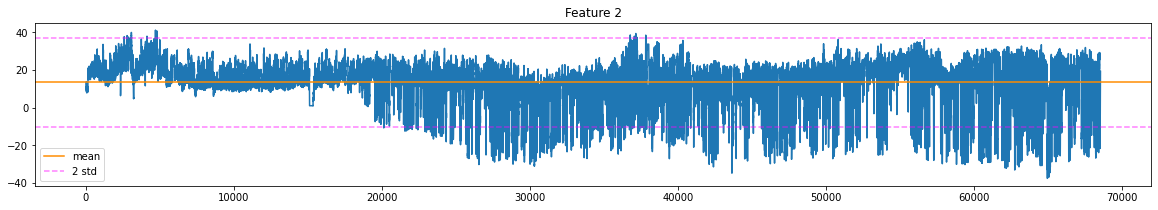

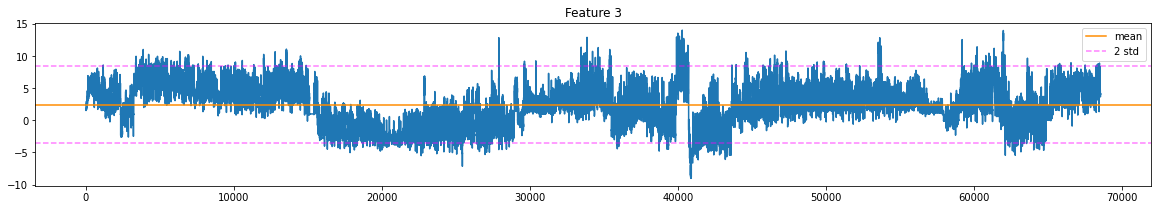

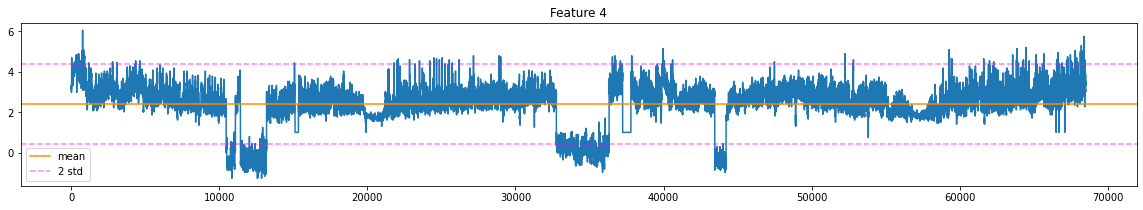

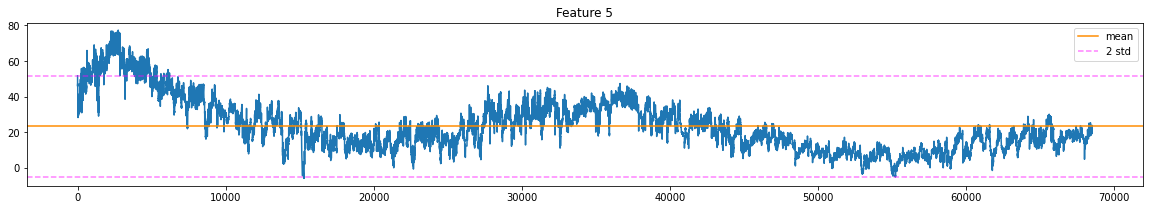

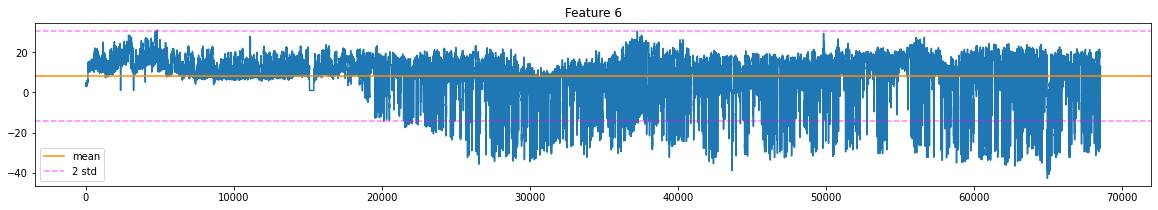

In [7]:
for i in range(X.shape[-1]):
    plt.figure(figsize=(20,3))
    plt.plot(X[:,i])    
    plt.axhline(y=X_mean[i],color='darkorange',linestyle='-',label='mean')
    plt.axhline(y=X_mean[i]+2*X_std[i],color='magenta',linestyle='--',alpha=.5,label='2 std')
    plt.axhline(y=X_mean[i]-2*X_std[i],color='magenta',linestyle='--',alpha=.5)
    plt.legend()
    plt.title('Feature '+str(i))

## Scaling features

In [8]:
X_max = X.max(axis=0)
X_min = X.min(axis=0)

X_scaled = (X-X_min)/(X_max-X_min)
df_scaled = pd.DataFrame(X_scaled)

X_mean_scaled = X_scaled.mean(axis=0)
X_std_scaled = X_scaled.std(axis=0)

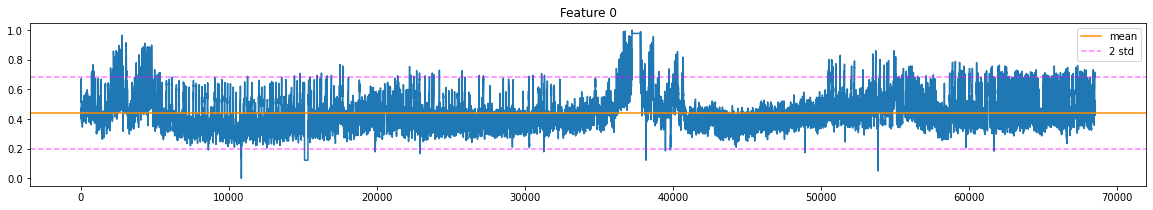

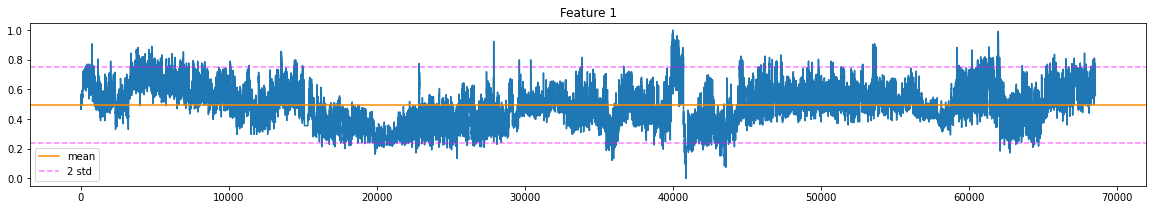

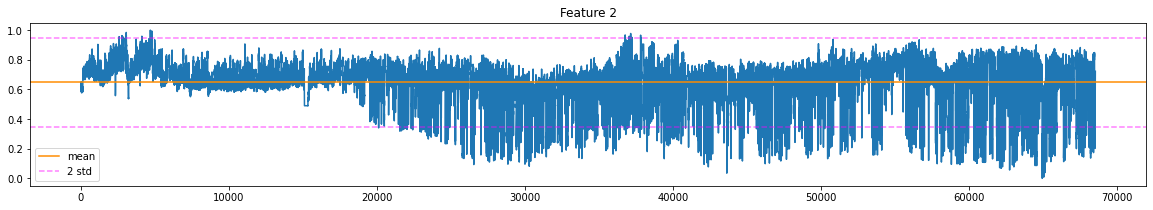

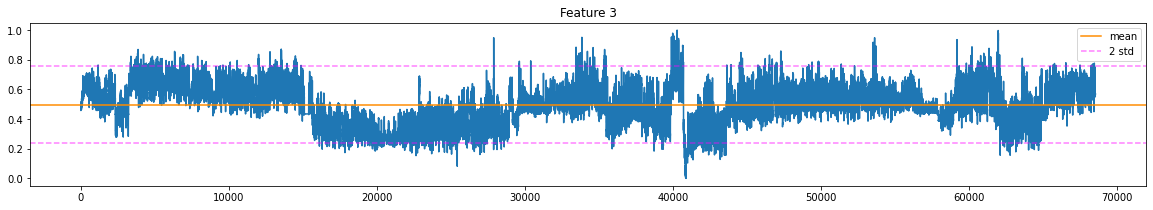

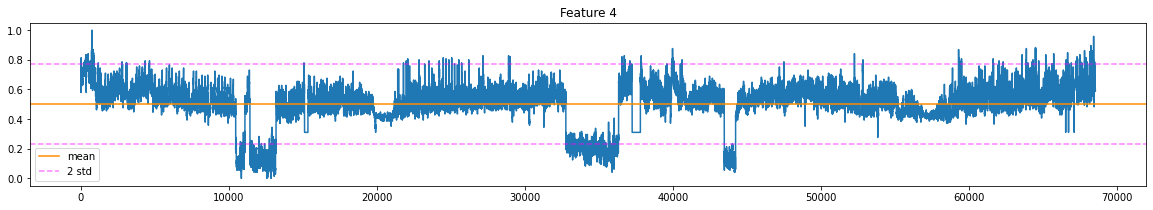

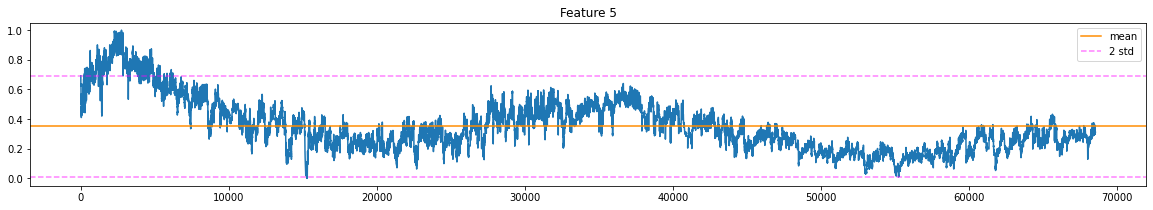

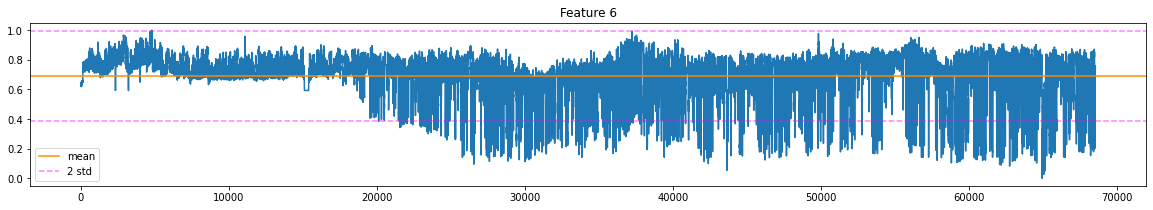

In [9]:
for i in range(X.shape[-1]):
    plt.figure(figsize=(20,3))
    plt.plot(X_scaled[:,i])    
    plt.axhline(y=X_mean_scaled[i],color='darkorange',linestyle='-',label='mean')
    plt.axhline(y=X_mean_scaled[i]+2*X_std_scaled[i],color='magenta',linestyle='--',alpha=.5,label='2 std')
    plt.axhline(y=X_mean_scaled[i]-2*X_std_scaled[i],color='magenta',linestyle='--',alpha=.5)
    plt.legend()
    plt.title('Feature '+str(i))

## Features correlations and distribution

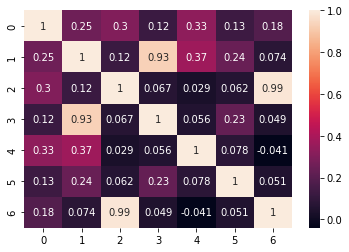

In [10]:
corrMatrix = df_scaled.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

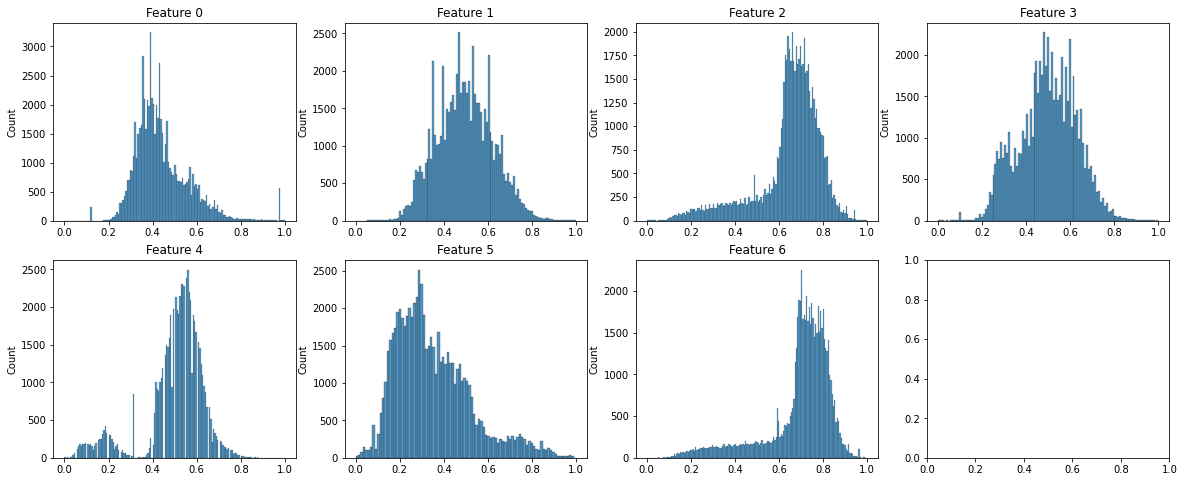

In [11]:
nrows=2
ncols=4
fig, axes = plt.subplots(nrows, ncols, figsize=(20,8))
for i in range(0,4):
    sns.histplot(X_scaled[:,i],ax=axes[0,i]).set(title='Feature ' + str(i))
for i in range(4,7):
    sns.histplot(X_scaled[:,i],ax=axes[1,i-4]).set(title='Feature ' + str(i))

## Looking for periodicity

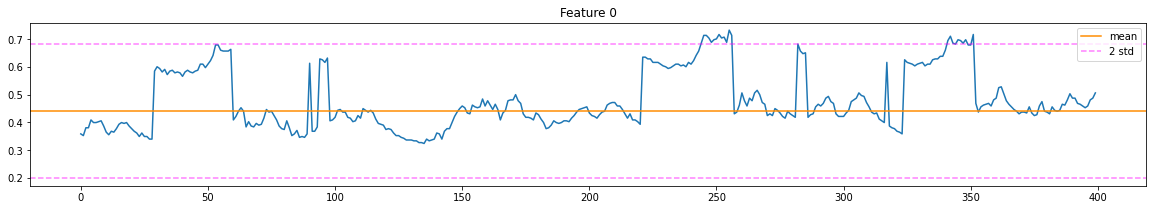

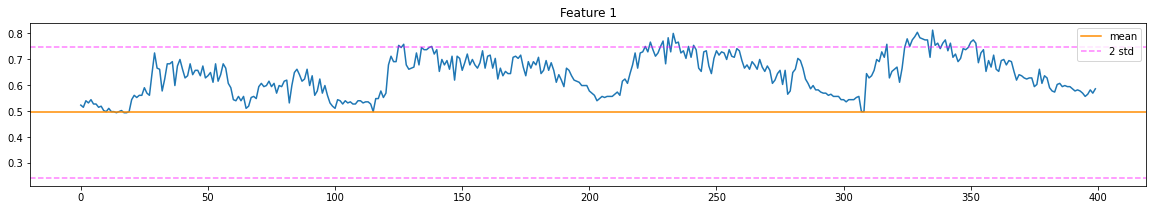

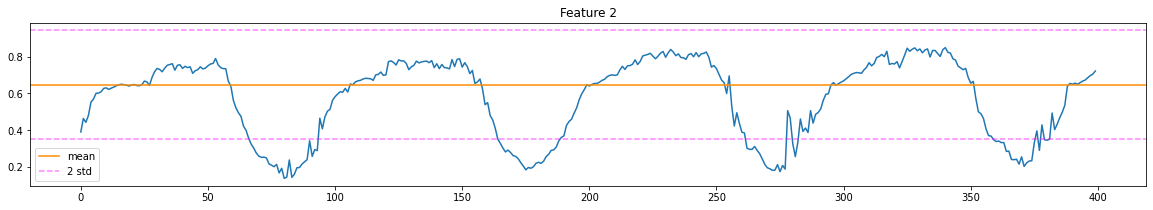

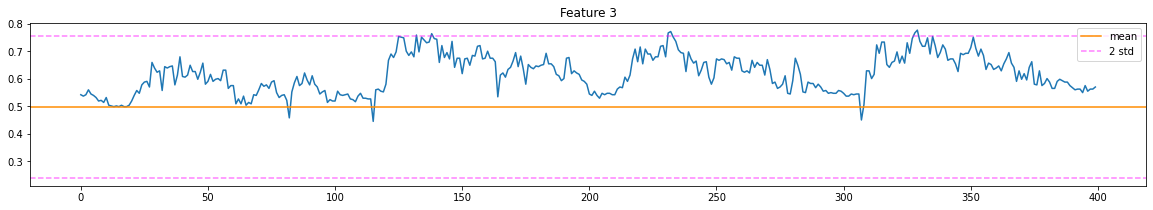

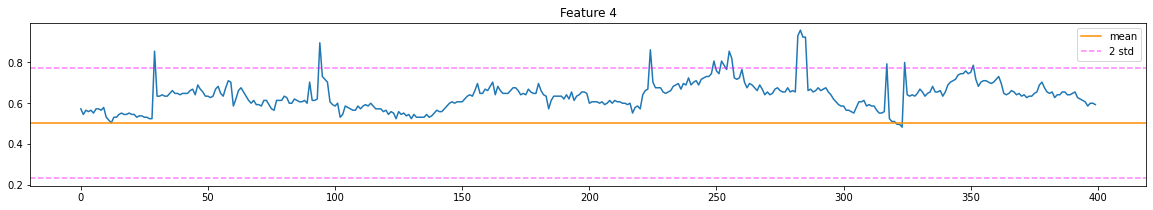

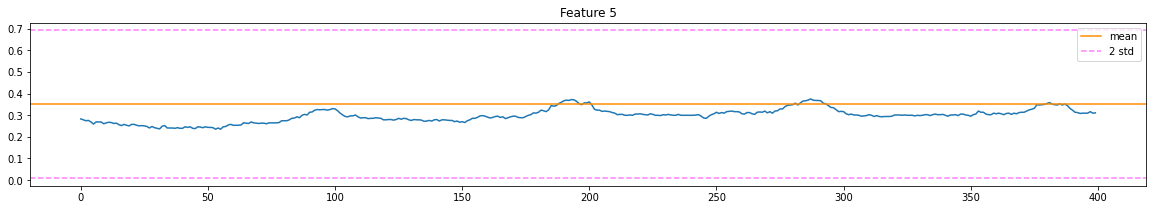

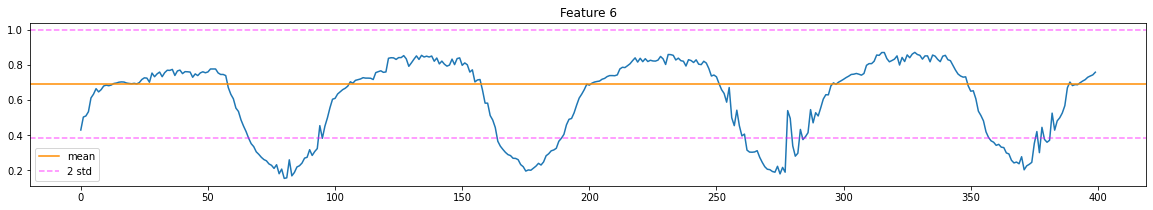

In [17]:
last_window=400
for i in range(X.shape[-1]):
    plt.figure(figsize=(20,3))
    plt.plot(X_scaled[-last_window:,i])    
    plt.axhline(y=X_mean_scaled[i],color='darkorange',linestyle='-',label='mean')
    plt.axhline(y=X_mean_scaled[i]+2*X_std_scaled[i],color='magenta',linestyle='--',alpha=.5,label='2 std')
    plt.axhline(y=X_mean_scaled[i]-2*X_std_scaled[i],color='magenta',linestyle='--',alpha=.5)
    plt.legend()
    plt.title('Feature '+str(i))

By looking at the plot, a reasonable window should at least take ~200 timesteps to capture the periodicity of timeseries.